<h2>Task 1: </h2>
<h3>Analysing Pre-trained Word Embeddings (6 Points)</h3>


In [29]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [30]:
"""
    Following function returns pretrained glove model in the dictionary format.
    The keys will be all the words in vocabulary.
    The value will be the corresponding vector.
"""

def load_glove_model(filename):
    model = {}
    with open(filename, 'r') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            model[word] = embedding
    print("Model loaded !")
    print(f"{len(model)} words found with {len(model[word])} vector size !")
    return model

In [31]:
!wget https://nlp.stanford.edu/data/glove.6B.zip


--2022-11-28 10:35:44--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-11-28 10:35:44--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  4.76MB/s    in 2m 40s  

2022-11-28 10:38:24 (5.15 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [32]:
!unzip /content/glove.6B.zip


Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [33]:
filename = "./glove.6B.50d.txt" #""
model = load_glove_model(filename)
vocab = list(model.keys())

Model loaded !
400000 words found with 50 vector size !


#### Complete the following cosine and euclidean distance functions

In [34]:
def norm(vector, p):
    return sum([i**p for i in vector])**(1/p)

def cosine_distance(vec_a, vec_b):
    
    dist = None
    # TODO implement the cosine distance without using
    # any additional library
    dist = vec_a @ vec_b/(norm(vec_a,2) * norm(vec_b,2))
    return 1 - dist

In [35]:
cosine_distance(model["female"],model["female"])

-2.220446049250313e-16

In [36]:
def euclidean_distance(vec_a, vec_b):
    """
    Calculates euclidean distance between two vectors.
    """
    dist = None
    # TODO implement the euclidean distance without using
    # any additional library
    dist = norm(vec_a-vec_b,2)
    return dist

In [37]:
euclidean_distance(model["female"],model["female"])

0.0

<h4>Part a:</h4>


#### Chose random pairs of words as mentioned in the sheet and create an array of 'common_words'

In [39]:
common_words = ["female", "queen", "lady", "woman", "daughter", "apple", "single", "gift", "create", "finish" ]

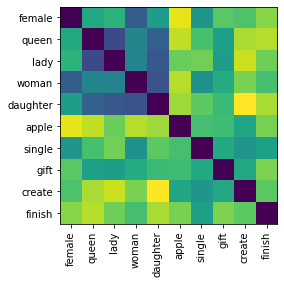

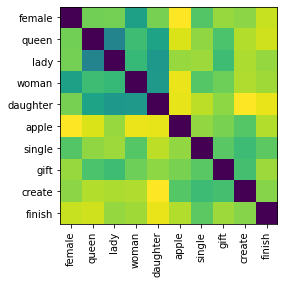

In [40]:
for i in [cosine_distance, euclidean_distance]:
    sim = []
    for j in common_words:
        temp = []
        for k in common_words:
            temp.append(i(model[j], model[k]))
        sim.append(temp)
    data = np.array(sim)
    data.resize(10, 10)
    plt.figure(figsize = (4, 4))
    plt.imshow(data, interpolation='nearest')
    plt.xticks(range(10), common_words, rotation=90);
    plt.yticks(range(10), common_words);
    plt.show()

###observation and analysis
As we can see from the following plots tha our initial assumptions of relatedness between similar words appears to he true. In case of Homonyms(words that are spelled alike but have different meanings eg, buy and by) it can be seen that they will result in a distance close to 0 (no idea how we can differentiate homonyms :( hard to tell without context? maybe using ngrams can get us the context we need).


<h4>Part b:</h4>

#### Perform PCA on the obtained word vectors and plot the first two components.

In [41]:
vocab_vec = [model[w] for w in vocab]

import pandas as pd

subset = np.array(vocab_vec)
pca = PCA(n_components=2)
projected = pca.fit_transform(subset)

print(subset.shape)
print(projected.shape)
#print components
print(pca.components_) #components
print(pca.explained_variance_ratio_)



(400000, 50)
(400000, 2)
[[ 1.45755389e-01  7.22366194e-02 -5.83668285e-02 -3.84047441e-02
   4.40393714e-02  7.65097932e-02 -7.25766064e-02 -1.47169079e-01
  -4.48917403e-02  1.45213980e-02 -4.58940229e-02 -1.32308230e-01
  -2.46559467e-02  2.91504296e-02  4.33610718e-02  5.39584720e-02
  -6.60364647e-02  7.45326542e-02 -2.73433799e-01 -6.40102684e-02
   9.98247450e-02  1.76743302e-02  4.39125481e-02  1.42945352e-02
  -1.23501406e-01 -3.63784168e-01 -1.43694083e-01  5.90499295e-02
   8.94782689e-02 -7.13979248e-02  6.56982906e-01  1.48706483e-01
  -1.39568017e-01 -5.04861231e-02  6.24154861e-02  4.79999949e-03
  -2.68204323e-02 -1.05160036e-02 -5.17176072e-02 -1.28709822e-01
  -7.97190290e-02 -6.83388892e-02  5.92200524e-02  1.70495423e-01
  -1.12745853e-01  1.15847790e-01  4.55873774e-02  1.57751112e-02
  -2.23779050e-02 -2.17968656e-01]
 [ 3.18326142e-02  1.34788905e-02  2.75469615e-02  6.16405384e-02
   1.85323659e-01  1.16732087e-01 -2.32350985e-01 -1.17488364e-01
  -7.09732903e-0

['female' 'queen' 'lady' 'woman' 'daughter' 'apple' 'single' 'gift'
 'create' 'finish' '67.94' 'mainstem' 'continent-wide' 'post-crash'
 'collagen' 'revital' 'kltm' '200,000-a' 'maultsby' 'algarotti' 'wednesay'
 'extremadura' 'larfleeze' 'stating' '108-107' 'craters' '2,713' 'demento'
 'buhai' '12.91' 'sce' 'sachal' 'stimulates' 'plebeians' 'showpieces'
 'thrasivoulos' 'indiaman' 'kimbo' 'naomichi' 'zito' 'bbss' 'thurlby'
 'tutong' 'majoli' 'manyika' '1509' 'shortland' 'flatmate' 'shevah'
 'funnyordie.com']
50


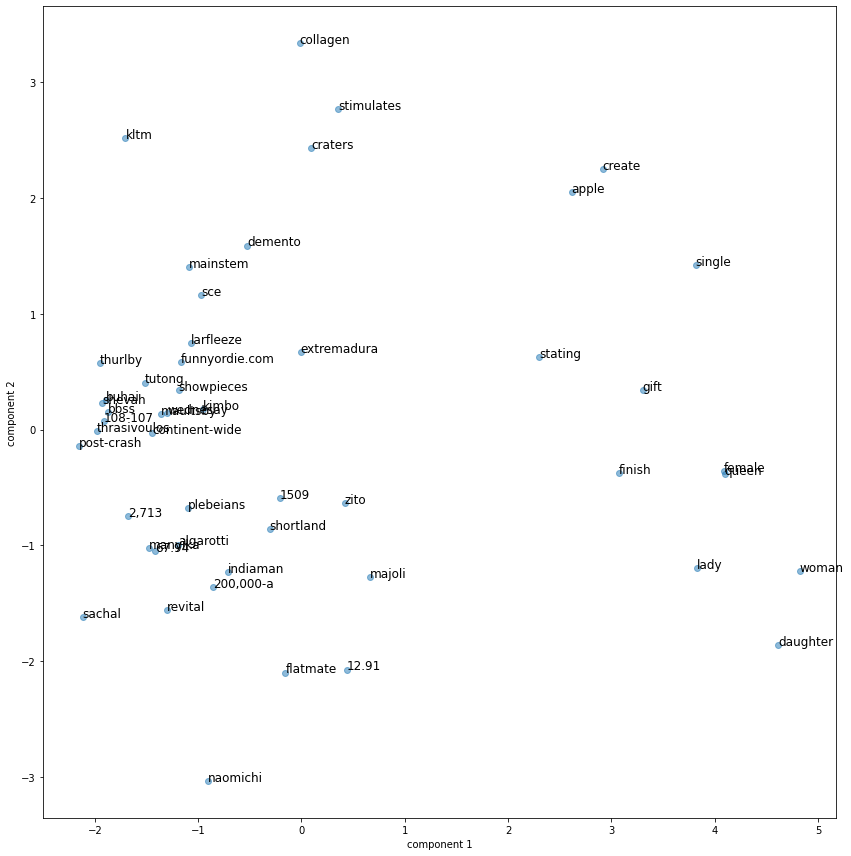

In [42]:

display_words = np.concatenate([np.array(common_words), np.random.choice(vocab, 40)])
print(display_words)
print(len(display_words))
display_word_vec = [model[w] for w in display_words]
#print(display_word_vec)

display_subset = np.array(display_word_vec)
pca = PCA(n_components=2)
display_projected = pca.fit_transform(display_subset)
#print(display_subset)

plt.figure(figsize=(12, 12))

# TODO: Visualize the PCA for the previously selected common words 


plt.scatter(display_projected[:, 0], display_projected[:, 1], alpha=0.5)
for i, word in enumerate(display_words):
  plt.text(display_projected[i, 0], display_projected[i, 1],display_words[i], fontsize=12)

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.tight_layout()

plt.show()

### Observations and analysis
We can see that our assumptions about words (lady,female, woman, daughter,queen) seem to correlate with the visualisation above.

<h2>Task 2: </h2>
<h3>Computing Word Embeddings : Word2Vec (12 points)</h3>
<h4>Part a:</h4>


#### Train the following CBOW and SkipGram models by completing their 'forward' functions. Use appropriate activation functions wherever necessary.

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from nltk.tokenize import sent_tokenize

In [44]:
raw_text = """The stand up was by far the best one. The comedy special was horrible. This movie also has a very good ending. The ending was sorry as I just didn't care for the characters. The plot is tight and the acting is flawless. The plot is predictable and the movie is long. Good historical drama which is very educational and entertaining. It was entirely over dramatic and boring. The romance of the movie is good and nicely presented. It was the most terrible romance movie I had ever watched. Movie has a unique science fiction element which makes it hillarious. The old science fiction trope is overused and stale. This movie is rich with action and gore. To make it interesting, they threw in some gore but were unsuccessful. The cinematography is outstanding. This movie had an inconsistent cinematography. For a comedy this has a decent and inventive plot. The plot is an absolute mess. The movie has lots of plot twists which has a huge payoff. There are so many plot twists that you can never be sure to root for. The story and ending were so brutal that they made up for a lot. There was no explanation, the ending was incomplete. Great story line, fantastic music, great visual effects. Thread bare plot, bad acting, bad visual effects. A great concept, a great cast and I loved it. The concept was hardly original."""

In [45]:
class CBOW(nn.Module):
  
    def __init__(self, vocab_size, embedding_dim):
        super(CBOW, self).__init__()

        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

        self.sigmoid = nn.Sigmoid()

        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, inputs):
        # : Complete the function
        output = sum(self.embeddings(inputs)).view(1, -1)
        output = self.sigmoid(output)
        output = self.linear1(output)
        output = self.sigmoid(output)
        output = self.linear2(output)
        output = self.log_softmax(output)

        return output

In [46]:
class SkipGram(nn.Module):
    
    def __init__(self, vocab_size, context_size, embedding_dim):
        super(SkipGram, self).__init__()

        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, 128)
        self.linear2 = nn.Linear(128, context_size * vocab_size)
        self.context_size = context_size

        self.sigmoid = nn.Sigmoid()

        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, inputs):
        # TODO: Complete the function
        # Hint: Exactly same as CBOW forward function just have to use
        # 'context_size' in the last layer to resize view`
        output = sum(self.embeddings(inputs)).view(1, -1)
        output = self.sigmoid(output)
        output = self.linear1(output)
        output = self.sigmoid(output)
        output = self.linear2(output)
        output = self.log_softmax(output).view(self.context_size,-1)

        return output

In [47]:
def generate_training_data(raw_text, context_size, CBOW=True):
    """
    TODO:
    Generate training data from the raw text in appropriate format. An output
    containing list of tuples of context and target is expected. A context will
    be list of words and target will be singular word.
    Based on 'CBOW' boolean list of tuples will be either
    [(context, target), ...] or if false it will be [(target, context), ...]

    For eg for the following raw_text =
    "We are about to study the idea of business"
    with CBOW = True and context_size = 2, we get (list with five tuples):

    "We are to study" -> (['We', 'are', 'to', 'study'], 'about')
    "are about study the" -> (['are', 'about', 'study', 'the'], 'to')
    "about to the idea" -> (['about', 'to', 'the', 'idea'], 'study')
    "to study idea of" -> (['to', 'study', 'idea', 'of'], 'the')
    "study the of business" -> (['study', 'the', 'of', 'business'], 'idea')]

    Similarly if CBOW = False i.e. dataset is for skip gram then:
    
    "We are to study" -> ('about', ['We', 'are', 'to', 'study'])
    .
    .
    .

    """
    data = []

    sentences = raw_text.split(".")

    for sentence in sentences:
        sentence = sentence+ "."
        tokens = sentence.split()
        for i in range(len(tokens)-context_size*2):
            a = tokens[i+context_size]
            b = tokens[i:i+context_size] + tokens[i+context_size+1: i+2*context_size+1]
            if CBOW: data.append((b, a))
            else: data.append((a,b))
    
    return data


#generate_training_data(raw_text, 2, CBOW=True)

In [48]:
def get_training_data_idx(word_to_ix, data):
    """
    This function is to get idx values from the vocabulary for training data.

    For eg:
    CBOW
    Input: [(['We', 'are', 'to', 'study'], 'about'), ...]
    Output: [(tensor([ 34,  55,  96, 125]), tensor([6])), ...]

    SkipGram
    Input: [('about', ['We', 'are', 'to', 'study']), ...]
    Output: [(tensor([6]), tensor([ 34,  55,  96, 125])), ...]

    word_to_idx is already provided
    """
    output = []
    for i in data:
        if isinstance(i[0], list):
            a = torch.tensor([word_to_ix[w] for w in i[0]], dtype=torch.long)
            b = torch.tensor([word_to_ix[i[1]]], dtype=torch.long)
        else:
            a = torch.tensor([word_to_ix[i[0]]], dtype=torch.long)
            b = torch.tensor([word_to_ix[w] for w in i[1]], dtype=torch.long)
        output.append((a, b))
    return output

In [49]:
def train(model, data, loss_function, optimizer, num_epochs):
    # TODO: Complete the training function
    losses = []
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for context, target in data:
            optimizer.zero_grad()
            model_result = model(context)
            total_loss = loss_function(model_result, target)

            total_loss.backward()

            optimizer.step()

        if epoch % 10 == 0:
            print (f'Epoch [{epoch} / {num_epochs}], Loss: {total_loss.item():.4f}')

        losses.append(total_loss.item())
    return losses

In [50]:
context_size = 2
num_epochs = 200

vocab = set(raw_text.split())
vocab_size = len(vocab)

word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}


In [51]:
print('CBOW')
cbow_data = generate_training_data(raw_text, context_size, CBOW=True)
cbow_data_idx = get_training_data_idx(word_to_ix, cbow_data)
print(cbow_data[:2])
print(cbow_data_idx[:2])

print('SkipGram')
skipgram_data = generate_training_data(raw_text, context_size, CBOW=False)
skipgram_data_idx = get_training_data_idx(word_to_ix, skipgram_data)
print(skipgram_data[:2])
print(skipgram_data_idx[:2])

CBOW
[(['The', 'stand', 'was', 'by'], 'up'), (['stand', 'up', 'by', 'far'], 'was')]
[(tensor([84, 41, 32, 42]), tensor([102])), (tensor([ 41, 102,  42,  70]), tensor([32]))]
SkipGram
[('up', ['The', 'stand', 'was', 'by']), ('was', ['stand', 'up', 'by', 'far'])]
[(tensor([102]), tensor([84, 41, 32, 42])), (tensor([32]), tensor([ 41, 102,  42,  70]))]


In [52]:
cbow_model = CBOW(vocab_size, embedding_dim=100)
skipgram_model = SkipGram(vocab_size, context_size * 2, embedding_dim=100)

cbow_optimizer = optim.SGD(cbow_model.parameters(), lr=0.01)
skipgram_optimizer = optim.SGD(skipgram_model.parameters(), lr=0.01)

print('CBOW')
cbow_loss = train(cbow_model, cbow_data_idx, nn.NLLLoss(), cbow_optimizer, num_epochs)
print('SkipGram')
skipgram_loss = train(skipgram_model, skipgram_data_idx, nn.NLLLoss(), skipgram_optimizer, num_epochs)

CBOW
Epoch [0 / 200], Loss: 5.0308
Epoch [10 / 200], Loss: 4.2247
Epoch [20 / 200], Loss: 4.1338
Epoch [30 / 200], Loss: 4.0360
Epoch [40 / 200], Loss: 3.9279
Epoch [50 / 200], Loss: 3.8046
Epoch [60 / 200], Loss: 3.6589
Epoch [70 / 200], Loss: 3.4809
Epoch [80 / 200], Loss: 3.2584
Epoch [90 / 200], Loss: 2.9778
Epoch [100 / 200], Loss: 2.6297
Epoch [110 / 200], Loss: 2.2187
Epoch [120 / 200], Loss: 1.7725
Epoch [130 / 200], Loss: 1.3407
Epoch [140 / 200], Loss: 0.9748
Epoch [150 / 200], Loss: 0.7000
Epoch [160 / 200], Loss: 0.5091
Epoch [170 / 200], Loss: 0.3805
Epoch [180 / 200], Loss: 0.2934
Epoch [190 / 200], Loss: 0.2331
SkipGram
Epoch [0 / 200], Loss: 6.4757
Epoch [10 / 200], Loss: 5.9833
Epoch [20 / 200], Loss: 5.9039
Epoch [30 / 200], Loss: 5.8428
Epoch [40 / 200], Loss: 5.8058
Epoch [50 / 200], Loss: 5.7831
Epoch [60 / 200], Loss: 5.7669
Epoch [70 / 200], Loss: 5.7536
Epoch [80 / 200], Loss: 5.7413
Epoch [90 / 200], Loss: 5.7292
Epoch [100 / 200], Loss: 5.7168
Epoch [110 / 200

<Figure size 288x288 with 0 Axes>

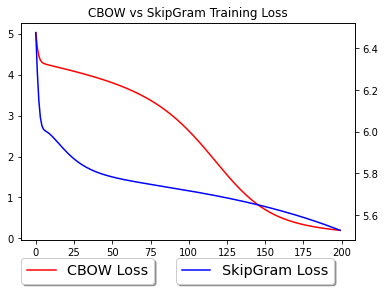

In [53]:
cbow_model.eval()
torch.no_grad()

plt.figure(figsize = (4, 4))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(cbow_loss, label='CBOW Loss', color = 'r')
ax2.plot(skipgram_loss, label='SkipGram Loss', color = 'b')
plt.title('CBOW vs SkipGram Training Loss')
ax1.legend(loc='upper center', bbox_to_anchor=(0.2, -0.05),\
            shadow=True, fontsize='x-large')
ax2.legend(loc='upper center', bbox_to_anchor=(0.7, -0.05),\
            shadow=True, fontsize='x-large')
plt.show()

<h4>Part b:</h4>


In [54]:
# TODO: Use context window 2 and 3 to train the best model of your choice and plot their results
print('CBOW With context size 2')
cbow_data_2 = generate_training_data(raw_text, 2, CBOW=True)
cbow_data_idx_2 = get_training_data_idx(word_to_ix, cbow_data_2)
print(cbow_data_2)
print(cbow_data_idx_2)

print('CBOW With context size 3')
cbow_data_3 = generate_training_data(raw_text, 3, CBOW=True)
cbow_data_idx_3 = get_training_data_idx(word_to_ix, cbow_data_3)
print(cbow_data_3[:2])
print(cbow_data_idx_3[:2])

CBOW With context size 2
[(['The', 'stand', 'was', 'by'], 'up'), (['stand', 'up', 'by', 'far'], 'was'), (['up', 'was', 'far', 'the'], 'by'), (['was', 'by', 'the', 'best'], 'far'), (['by', 'far', 'best', 'one.'], 'the'), (['The', 'comedy', 'was', 'horrible.'], 'special'), (['This', 'movie', 'has', 'a'], 'also'), (['movie', 'also', 'a', 'very'], 'has'), (['also', 'has', 'very', 'good'], 'a'), (['has', 'a', 'good', 'ending.'], 'very'), (['The', 'ending', 'sorry', 'as'], 'was'), (['ending', 'was', 'as', 'I'], 'sorry'), (['was', 'sorry', 'I', 'just'], 'as'), (['sorry', 'as', 'just', "didn't"], 'I'), (['as', 'I', "didn't", 'care'], 'just'), (['I', 'just', 'care', 'for'], "didn't"), (['just', "didn't", 'for', 'the'], 'care'), (["didn't", 'care', 'the', 'characters.'], 'for'), (['The', 'plot', 'tight', 'and'], 'is'), (['plot', 'is', 'and', 'the'], 'tight'), (['is', 'tight', 'the', 'acting'], 'and'), (['tight', 'and', 'acting', 'is'], 'the'), (['and', 'the', 'is', 'flawless.'], 'acting'), (['Th

In [55]:
cbow_model_with_context_size_2 = CBOW(vocab_size, embedding_dim=100)
cbow_model_with_context_size_3 = CBOW(vocab_size, embedding_dim=100)

cbow_optimizer_2 = optim.SGD(cbow_model_with_context_size_2.parameters(), lr=0.01)
cbow_optimizer_3 = optim.SGD(cbow_model_with_context_size_3.parameters(), lr=0.01)

print('CBOW With context size 2')
cbow_loss_2 = train(cbow_model_with_context_size_2, cbow_data_idx, nn.NLLLoss(), cbow_optimizer_2, num_epochs)
print('CBOW With context size 3')
cbow_loss_3 = train(cbow_model_with_context_size_3, cbow_data_idx, nn.NLLLoss(), cbow_optimizer_3, num_epochs)

CBOW With context size 2
Epoch [0 / 200], Loss: 5.0750
Epoch [10 / 200], Loss: 4.1655
Epoch [20 / 200], Loss: 4.0873
Epoch [30 / 200], Loss: 4.0027
Epoch [40 / 200], Loss: 3.9094
Epoch [50 / 200], Loss: 3.8027
Epoch [60 / 200], Loss: 3.6745
Epoch [70 / 200], Loss: 3.5137
Epoch [80 / 200], Loss: 3.3077
Epoch [90 / 200], Loss: 3.0465
Epoch [100 / 200], Loss: 2.7276
Epoch [110 / 200], Loss: 2.3595
Epoch [120 / 200], Loss: 1.9606
Epoch [130 / 200], Loss: 1.5582
Epoch [140 / 200], Loss: 1.1865
Epoch [150 / 200], Loss: 0.8758
Epoch [160 / 200], Loss: 0.6392
Epoch [170 / 200], Loss: 0.4707
Epoch [180 / 200], Loss: 0.3543
Epoch [190 / 200], Loss: 0.2742
CBOW With context size 3
Epoch [0 / 200], Loss: 5.1087
Epoch [10 / 200], Loss: 4.1405
Epoch [20 / 200], Loss: 4.0390
Epoch [30 / 200], Loss: 3.9257
Epoch [40 / 200], Loss: 3.7958
Epoch [50 / 200], Loss: 3.6414
Epoch [60 / 200], Loss: 3.4505
Epoch [70 / 200], Loss: 3.2097
Epoch [80 / 200], Loss: 2.9100
Epoch [90 / 200], Loss: 2.5552
Epoch [100 /

<Figure size 288x288 with 0 Axes>

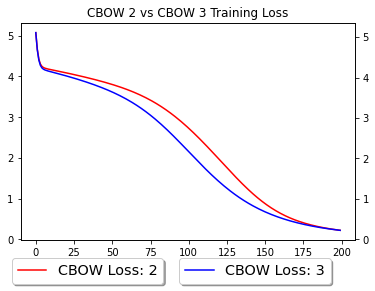

In [56]:
cbow_model.eval()
torch.no_grad()

plt.figure(figsize = (4, 4))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(cbow_loss_2, label='CBOW Loss: 2', color = 'r')
ax2.plot(cbow_loss_3, label='CBOW Loss: 3', color = 'b')
plt.title('CBOW 2 vs CBOW 3 Training Loss')
ax1.legend(loc='upper center', bbox_to_anchor=(0.2, -0.05),\
            shadow=True, fontsize='x-large')
ax2.legend(loc='upper center', bbox_to_anchor=(0.7, -0.05),\
            shadow=True, fontsize='x-large')
plt.show()

<h4>Results</h4>
<p>The training accuracy of CBOW with context size 2 is slightly better than context size 3. This can be due to the fact that the words appearing closer to the given words are more significant in predicting the midddle word. The accuracy decrease in context size 3 is due to the increase of noise in the input string passed to the model.</p>

<h2>Task 3: </h2>
<h3>Implementing RNN-LSTM classifier (6 points)</h3>
<p>Implement RNN-LSTM classifier, plot the training loss and print the test accuracy.</p>

In [ ]:
# TODO: Split raw data into positive and negative reviews
# eg: X = ['...', '...', '...', '...', '...', ...], Y = [0, 1, 1, 0, 1, ...]


In [21]:
import nltk
nltk.download('punkt')
from nltk import tokenize


X, y = [], []    
X = tokenize.sent_tokenize(raw_text)

# where 1 is positive and 0 is negative review
y = [0 if (i+1)%2 else 1 for i in range(len(X))]
print(y)
print(X)

max_str = max(X,key=lambda x: len(x.split())) # getting max len sentence for padding
max_str

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
['The stand up was by far the best one.', 'The comedy special was horrible.', 'This movie also has a very good ending.', "The ending was sorry as I just didn't care for the characters.", 'The plot is tight and the acting is flawless.', 'The plot is predictable and the movie is long.', 'Good historical drama which is very educational and entertaining.', 'It was entirely over dramatic and boring.', 'The romance of the movie is good and nicely presented.', 'It was the most terrible romance movie I had ever watched.', 'Movie has a unique science fiction element which makes it hillarious.', 'The old science fiction trope is overused and stale.', 'This movie is rich with action and gore.', 'To make it interesting, they threw in some gore but were unsuccessful.', 'The cinematography is outstanding.', 'This movie had an inconsistent cinematography.', 'For a comedy this has a decent and inventive plot.', 'The plot is

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'There are so many plot twists that you can never be sure to root for.'

In [5]:
train_split = 0.8
train_set, test_set = [], []
# TODO: Split data into test and training set
train_samples = int(len(X)* train_split)
test_samples = int(len(X)-train_samples)
print(train_samples)
print(test_samples)

X_train = X[:train_samples] #features
X_test = X[train_samples:]

y_train = y[:train_samples] #labels
y_test = y[train_samples:]

print(len(X_train), len(y_train))
print(X_test, y_test)

20
6
20 20
['The story and ending were so brutal that they made up for a lot.', 'There was no explanation, the ending was incomplete.', 'Great story line, fantastic music, great visual effects.', 'Thread bare plot, bad acting, bad visual effects.', 'A great concept, a great cast and I loved it.', 'The concept was hardly original.'] [0, 1, 0, 1, 0, 1]


In [28]:
data_idx = []

# TODO: Convert the textual data to tensors to train the model



def train(model, data, loss_function, optimizer, num_epochs):
    # TODO: Complete the training function
    losses = []
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for context, target in data:
            optimizer.zero_grad()
            context = cbow_model(context)
            model_result = model(context)
            total_loss = loss_function(model_result, target)

            total_loss.backward()

            optimizer.step()

        if epoch % 10 == 0:
            print (f'Epoch [{epoch} / {num_epochs}], Loss: {total_loss.item():.4f}')

        losses.append(total_loss.item())
    return losses


cbow_model.eval()


CBOW(
  (embeddings): Embedding(140, 100)
  (linear1): Linear(in_features=100, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=140, bias=True)
  (sigmoid): Sigmoid()
  (log_softmax): LogSoftmax(dim=1)
)

In [26]:
#Apply padding
max_len = len(max_str.split())

for sent in data_idx:
   if len(sent.split()) < max_len:
     n_pads = max_len - len(sent.split()) 
     i += ([torch.zeros(1)]* n_pads)
data_idx


[]

In [ ]:
class SentimentClassifier(nn.ModuleList):

    def __init__(self, input_size, embedding_dim, hidden_dim=256, LSTM_layers_size=2):
        
        super(SentimentClassifier, self).__init__()

        self.embedding = nn.Embedding(input_size, embedding_dim)
        
        self.lstm = nn.LSTM(input_size=15*embedding_dim, hidden_size=hidden_dim, num_layers=LSTM_layers_size, batch_first=True)
        
        self.fc = nn.Linear(hidden_dim, 1)
        
        self.sig = nn.Sigmoid()
        
        
    # TODO: Complete the forward function
    def forward(self, x):
    
        output = sum(self.embeddings(x)).view(1, -1)
        output = self.sig(output)
        output = self.lstm(output)
        output = self.sig(output)
        output = self.fc(output)
        
        return output


NameError: name 'nn' is not defined

In [ ]:
num_epochs = 20
embedding_dim = 20
clf = SentimentClassifier(vocab_size, embedding_dim)
optimizer = optim.Adam(clf.parameters(), lr=0.01)
loss_function = nn.BCELoss()
losses = []

In [ ]:
# TODO: Train classifier

In [ ]:
# TODO: Plot training performance (loss, accuracy)

In [ ]:
# TODO: Get test accuracy